# First Panda Project - cleaning datasets

### Importing


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 

# Importing data 
# * because an error we should use encoding='latin-1'

df = pd.read_csv('../../../../data/attacks.csv', encoding='latin-1')
print(df.shape)
df.head()

(25723, 24)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN



### Reflexions and raw data description
- The last two columns are probably empty
- The information of the following columns is problably not relevant at all:
    - original order
    - href
    - href formula
    - pdf
    - Investigator or Source
    - Name
    - Case Number 	
- Meanwhile the others columns looks important:
    - Date
    - Year
    - Type
    - Country
    - Area 	
    - Location
    - Activity 	
    - Sex (of the shark)
    - Species
    
#### --> First hipothesis
    The sharks attack depend on the season

### Cleaning

##### Data description


- The last two columns are probably empty


In [2]:
print(df["Unnamed: 22"].value_counts())
print(df["Unnamed: 23"].value_counts())

stopped here    1
Name: Unnamed: 22, dtype: int64
Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64


- Yes, there are eampty. Dropping the last two columns

In [3]:
df=df.drop(["Unnamed: 22", "Unnamed: 23"],axis=1)

In [4]:
# Some columns were missing from the first head
print(df.columns)
# the columns that were missing.
df[['Age', 'Injury', 'Fatal (Y/N)', 'Time']].head()

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')


,Age,Injury,Fatal (Y/N),Time
0,57,"No injury to occupant, outrigger canoe and pad...",N,18h00
1,11,Minor injury to left thigh,N,14h00 -15h00
2,48,Injury to left lower leg from surfboard skeg,N,07h45
3,NaN,Minor injury to lower leg,N,NaN
4,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN


[('Case Number', 8702),
 ('Date', 6302),
 ('Year', 6300),
 ('Type', 6298),
 ('Country', 6252),
 ('Area', 5847),
 ('Location', 5762),
 ('Activity', 5758),
 ('Name', 6092),
 ('Sex ', 5737),
 ('Age', 3471),
 ('Injury', 6274),
 ('Fatal (Y/N)', 5763),
 ('Time', 2948),
 ('Species ', 3464),
 ('Investigator or Source', 6285),
 ('pdf', 6302),
 ('href formula', 6301),
 ('href', 6302),
 ('Case Number.1', 6302),
 ('Case Number.2', 6302),
 ('original order', 6309)]

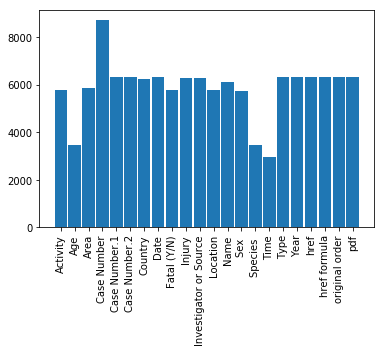

In [5]:
# Drop rows with null values
# Total number of null value by columns
Null_col=df.isna()
Null_g=[]
for col in Null_col.columns:
    Null_g.append((col , Null_col[col].value_counts().loc[False]) )

labels, ys = zip(*Null_g)
xs = np.arange(len(labels)) 
width = 0.9

plt.xticks(rotation='vertical')
plt.bar(labels, ys, width, align='center')

Null_g 

In [6]:
# Count the null values by row (it takes timeeee)
Null_col.axes
null_total=[]
for i in range(Null_col.shape[0]):
    null_total.append(Null_col.loc[i].sum()) 

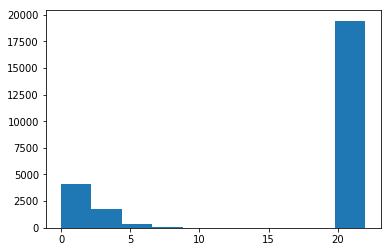

In [7]:
# Display the quantities by number of null in row.
plt.hist(null_total)
hist_null=np.histogram(null_total, bins=range(max(null_total)+1))

In [8]:
# there are 19414 register with null values in all 22 cell. 
hist_null

(array([ 1422,  1516,  1200,  1196,   540,   293,   102,    26,     7,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     7, 19414]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]))

In [9]:
# Drop the rows with 22 and 21 null values in all cells

df_null=pd.DataFrame(null_total,index=range(len(null_total)), columns=['n_nulls'])
index_null22 = np.where(df_null.n_nulls==22)
index_null22_l = list(index_null22[0])
df=df.drop(index_null22_l)
print(f'the new size of df: {df.shape}  after drop {len(index_null22_l)}')
index_null21 = np.where(df_null.n_nulls==21)
index_null21_l = list(index_null21[0])
df=df.drop(index_null21_l)
print(f'the new size of df: {df.shape}  after drop {len(index_null21_l)}')


the new size of df: (8703, 22)  after drop 17020
the new size of df: (6309, 22)  after drop 2394


In [10]:
# Count the null values by row (it takes timeeee)
Null_col_1=df.isna()
null_total_1=[]
for i in range(Null_col_1.shape[0]):
    null_total_1.append(Null_col_1.loc[i].sum()) 
    

(array([1422, 1516, 1200, 1196,  540,  293,  102,   26,    7,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    7]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]))

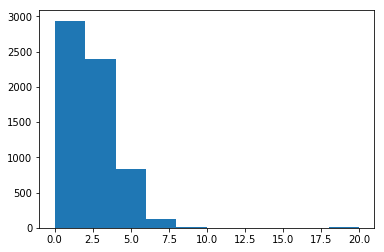

In [11]:
# new histogram
plt.hist(null_total_1)
hist_null_1=np.histogram(null_total_1, bins=range(max(null_total_1)+1))
hist_null_1

In [12]:
# cleaning columns -- "Fatal (Y/N)"

print(df['Fatal (Y/N)'].value_counts())

print(f"numero total de columnas --> {df.shape}")
print(f"numero total de columnas Null --> { df[df['Fatal (Y/N)'].isnull()].shape }")
# great numbers of nulls

#df['Fatal (Y/N)'].apply(lambda x: True if re.search(r'[^N|"UNKOWN"|"y"|"Y"]',x) else False)

N          4293
Y          1388
UNKNOWN      71
 N            7
2017          1
M             1
y             1
N             1
Name: Fatal (Y/N), dtype: int64
numero total de columnas --> (6309, 22)
numero total de columnas Null --> (546, 22)


- Analizing the columns: original order, href, href formula ,pdf, Investigator or Source, Name

In [13]:
df["original order"].describe()

count    6309.000000
mean     3155.999683
std      1821.396206
min         2.000000
25%      1579.000000
50%      3156.000000
75%      4733.000000
max      6310.000000
Name: original order, dtype: float64

#### Reflexion
It seems to be an index to register the attacks, so the information of consecutive if it was a time trend will be in the dates

In [14]:
df["href"].value_counts()

http://sharkattackfile.net/spreadsheets/pdf_directory/w014.01.25-Grant.pdf                  4
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.10.02.b-Vandenberg.pdf           3
http://sharkattackfile.net/spreadsheets/pdf_directory/1931.09.21.a-b-Holaday-Barrows.pdf    2
http://sharkattackfile.net/spreadsheets/pdf_directory/1923.00.00.a-NJ fisherman.pdf         2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.12.08.a-b-German.pdf             2
                                                                                           ..
http://sharkattackfile.net/spreadsheets/pdf_directory/1899.08.08.a-ArabBoy-13.pdf           1
http://sharkattackfile.net/spreadsheets/pdf_directory/1959.09.27-Rawlinson.pdf              1
http://sharkattackfile.net/spreadsheets/pdf_directory/1852.05.24-Messum-servant.pdf         1
http://sharkattackfile.net/spreadsheets/pdf_directory/2005.07.17.b-Onuk.pdf                 1
http://sharkattackfile.net/spreadsheets/pdf_directory/1957.0

#### Reflexion
It seems as a link to the pdf register of the attack, there are 4 register in one file, perhaps it could be repeated registers with the same information... let us check

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6304    False
6305    False
6306    False
6307    False
6308    False
Length: 6309, dtype: bool

In [16]:
df["href formula"].value_counts()

http://sharkattackfile.net/spreadsheets/pdf_directory/1923.00.00.a-NJ fisherman.pdf          2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.07.12.a-b-Stillwell-Fisher.pdf    2
http://sharkattackfile.net/spreadsheets/pdf_directory/1907.10.16.R-HongKong.pdf              2
http://sharkattackfile.net/spreadsheets/pdf_directory/1929.03.04.a-b.Roads-Aldridge.pdf      2
http://sharkattackfile.net/spreadsheets/pdf_directory/1906.09.27.R.a&b-Munich-Swede.pdf      2
                                                                                            ..
http://sharkattackfile.net/spreadsheets/pdf_directory/1949.00.00.c-Orava.pdf                 1
http://sharkattackfile.net/spreadsheets/pdf_directory/1956.07.20-Smedley.pdf                 1
http://sharkattackfile.net/spreadsheets/pdf_directory/1929.12.09.R-Duggan.pdf                1
http://sharkattackfile.net/spreadsheets/pdf_directory/1928.07.00-Bagolini.pdf                1
http://sharkattackfile.net/spreadsheets/pdf_direct

In [17]:
df["pdf"].value_counts()

1923.00.00.a-NJ fisherman.pdf        2
1934.12.23.a-b-Inman.pdf             2
1929.03.04.a-b.Roads-Aldridge.pdf    2
1921.11.27.a-b-Jack.pdf              2
1907.10.16.R-HongKong.pdf            2
                                    ..
1971.01.02-Painter.pdf               1
1997.10.28.a-Coots.pdf               1
1855.03.28-Coleman.pdf               1
1963.09.13-Barron.pdf                1
2009.04.20-Perez.pdf                 1
Name: pdf, Length: 6291, dtype: int64

In [18]:
df["Investigator or Source"].value_counts()

C. Moore, GSAF                             105
C. Creswell, GSAF                           92
S. Petersohn, GSAF                          82
R. Collier                                  55
T. Peake, GSAF                              48
                                          ... 
Portsmouth Herald, 3/6/1899                  1
Mansfield News-Journal, 7/16/1937, p.11      1
AJC, 4/5/2017                                1
A. Sharpe, pp.4, 86-87                       1
H.D. Baldridge                               1
Name: Investigator or Source, Length: 4969, dtype: int64

In [19]:
df["Name"].value_counts()

male               550
female              97
boy                 23
2 males             16
boat                14
                  ... 
Josh Edwards         1
Albert Rebecchi      1
David Miller         1
adult                1
Mark Jury            1
Name: Name, Length: 5230, dtype: int64